$$\bf{\text{Decision Tree}}$$

## Decision Trees

### Understanding Decision Trees

**What are decisoin trees?**

Decision tree is a powerful machine learning algorithm capable of performing regression and classificaion tasks. Also decision trees are the fundamental components of a range of ensemble models, such as *Random Forest and XGBoost.* In decision tree, we predict that each observation belong to the *most commonly occurring class* of training observations in the region to which it belongs. 


**How decision trees work?**

We use recursive binary splitting to grow trees(Scikit-Learn uses CART algorithm). Starting at the root node, we will calculate the metric, either *entropy* or *gini*, for every feature and select one feature with the minimum entropy or gini. Then we split training set into two subnodes, *leaf node* and *decision node*, and repeat the splitting procedure for decision node until all nodes are pure.

**Comparison between decision trees and linear models**

*Advantage:*

- Scale. Unlike linear models, which are greatly influenced by scales, decision trees are not sensitive to input feature scale because it is logical model consisting of step functions. 
- More flexible. Decision trees can explain not only simple linear relationships but also more complex non-linear relations, while the use of linear models is limited to data showing a linear relation.
- Decision trees are able to handle qualitative variables without creating dummy variables.
- Decision trees are very easy to explain to people because they are very similar to people's decision making.

*Disadvantage:*

- **Overfitting:** A small change in data can cause huge change in the final estimated tree. The problem can be solved by regularizing model parameters and pruning.
- **Inaccurate Prediction:** Decision trees are not a good fit for continuous variables and thus produce predictions not as accurate as other regession or classification techniques.


Now I will explain classification trees and regression trees separately using `iris` dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

# load iris dataset
iris = load_iris()
# create dataframe for iris data
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
display(iris_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


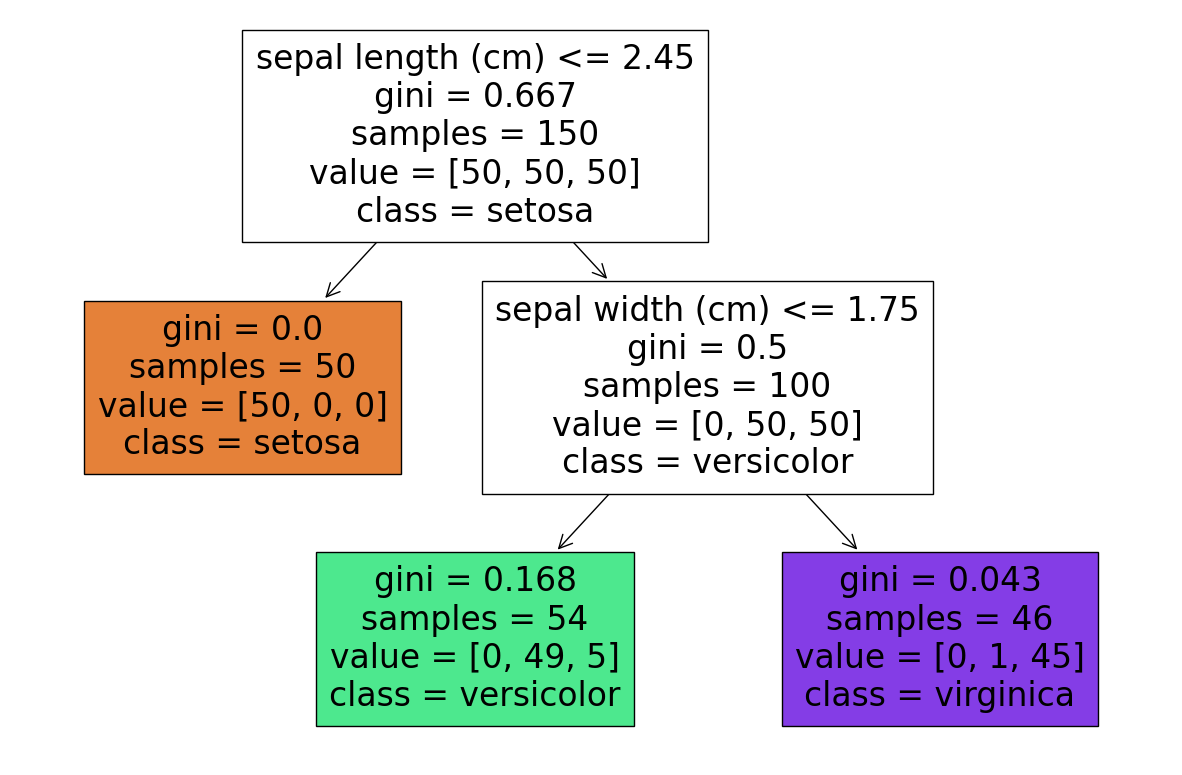

In [9]:
from sklearn import tree

# filter out sepal width and sepal length for building decision tress
X = iris.data[:,2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

fig = plt.figure(figsize=(15,10),dpi=100)
_ = tree.plot_tree(tree_clf,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)
plt.show()

**Explanation of the decision tree graph:**

- **Samples Attribute** indicates that how many training instances the node applies to. For example, $sample=150$ means that 150 training instances have sepal length smaller than 2.45.
- **Value Attribute** tells us that how many training instances of each class the node applies to. For example, value = $[50,50,50]$ means taht 50 training observations belong to first class, 50 training observations belong to the second class, etc. 
- **Gini Atrtibute** measures the impurity of the node. gini=0 means the node is pure.



When looking at the graph of decision tree, we may encounter a seris of unfamiliar terminologies. Now I will explain them:

**Root node**

Root node represents all training observations and root node will be further divided into two subnodes based on either gini or entropy. In the case, Root node is the top text box, which asks a question "Is the sepal length smaller or equal to 2.45?" If it is, then we move down to the left leaf node; otherwise, we move down to the right node, which is *decision node*.


**Leaf node**

In leaf node, all samples belong to only one class and thus it cannot be further splitted. In the case, the leaf node does not ask any question and gini score is 0.

**Decision node**

A subnode is decision node if it is further splitted into two subnodes. For example, the middle right text box is a decision node, which asks a question "Is the sepal width smaller than or equal to 1.75?". If it is, then we move down to the left green text box; otherwise, move down to the right purple text box.

### Evaluate Decision Trees

As we can see, growing trees completely depends on how we split and the decision of splitting greatly impacts the accuracy of decision trees. So how can we know which feature should we use for splitting? The answer depends on two criterion, *Gini Index and Entropy*. I will explain them one by one.

#### Gini

Gini impurity measures the possibility that a randomly selected observation is misclassified.

> Gini index or Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen.

> Gini impurity (named after Italian mathematician Corrado Gini) is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. -- *Wikipedia*

**Formula:**

$$G_i = 1 - \sum_{k=1}^nP_{i,k}^2$$

- $P_{i,k}$ is the ratio of class k instances to training instances in the $i^{th}$ node.

Take the decision tree we just built as an example, let's try to calculate the gini score for root node.

$\because P_{i,k} = \frac{1}{3}$

$\therefore$ $Gini_{root} = 1-\frac{1}{3}^2-\frac{1}{3}^2-\frac{1}{3}^2 = 0.67$

Now we compute the total gini score of the tree, which is a weighted average of gini score of each node.

$$G = \sum_{i=1}^nP_iG_i$$

- $P_i$ is the ratio of instances in one node to the training instances of parental node.

$G = 0.667 + \frac{1}{3}\times 0 + \frac{2}{3}\times 0.5 + \frac{54}{100}\times 0.168 + \frac{46}{100}\times0.043 = 1.111$

#### Entropy

**What is entropy?**

> In information theory, the entropy of a random variable is the average level of "information", "surprise", or "uncertainty" inherent to the variable's possible outcomes. --Wikipedia

In fact, entropy measures the amount of information needed to communicate the outcome of an event. Given a random variable X and a series of outcomes $x_1,\dots,x_n$, which occurs with the probability of $P(x_1),\dots,P(x_n).$ The entropy is defined as:

$$H(X) = -\sum_{i=1}^nP(x_i)\log_2{P(x_i)}$$

Now let me explain the definition given by wikipedia. What does it mean by the amount of surprise? Suppose that we toss a fair coin and we know that the result of the event is either head or tail. In the case, the event provides little information for us and, in other words, has little surprise because the result is basically within our expectation. Hence, the more likely or deterministic an event is, the less information or surprise it contains, and thus entropy is lower.

Let's try to calculate the entropy of flipping a coin: $-(\frac{1}{2}\log{\frac{1}{2}}+\frac{1}{2}\log{\frac{1}{2}}) = 1$

Let me introduced another example about machine learning. Look at the image:

<img src="https://www.section.io/engineering-education/entropy-information-gain-machine-learning/purity.png" width=400>

If we need to decide which node is easiest to classify, the answer must be the third one because all dots have the same color and so it require less information to describe it. In the case, the entropy of it is zero. Looking at other two nodes, we find that we need more information to describe them and so the event of classification becomes more uncertain. So the entropy of the two nodes are higher.

**Conditional Entropy**

Conditional entropy measures the amount of information still needed to communicate the outcome of an event y given that the information about x is known.

The conditional entropy of X given Y is defined as:

$$H(Y|X) = \sum Pr(Y|X)\log{Pr(Y|X)}$$

**Information Gain**

Information gain measures the reduction in entropy after we split certain node using a particular feature. So it is usually used to identify which feature should be used for splitting. 

$$\text{Information Gain = }H(X) - H(Y|X)$$

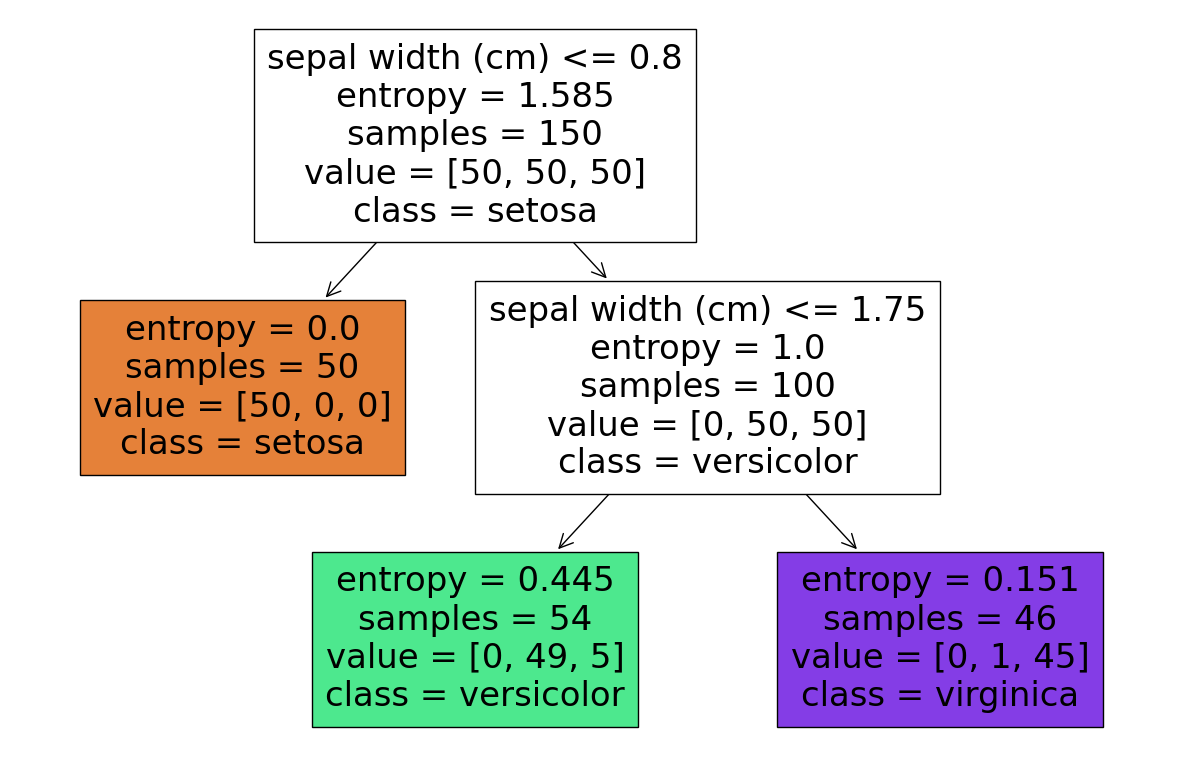

In [16]:
tree_clf = DecisionTreeClassifier(max_depth=2,criterion="entropy")
tree_clf.fit(X,y)

fig = plt.figure(figsize=(15,10),dpi=100)
_ = tree.plot_tree(tree_clf,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)
plt.show()

In [21]:
# Information Entropy root node
H0 = -1/3*np.log2(1/3)*3

# calculate the entropy for orange leaf node with samples of 50
H1 = -1*np.log2(1)

# entropy for white decision node with question of "Is sepal width smaller or equal to 1.75?"
H2 = -(1/2*np.log2(1/2)+1/2*np.log2(1/2))

# entropy for green leaf node
H3 = -(49/54*np.log2(49/54)+5/54*np.log2(5/54))

# entropy for purple decision node
H4 = -(1/46*np.log2(1/46)+45/46*np.log2(45/46))

print("Information Entropy:")
print(f"{round(H0,3)} bits")
print(f"{round(H1,3)} bits")
print(f"{round(H2,3)} bits")
print(f"{round(H3,3)} bits")
print(f"{round(H4,3)} bits")

Information Entropy:
1.585 bits
-0.0 bits
1.0 bits
0.445 bits
0.151 bits


Now I explain how to calculate the conditional entropy. Let's take the splitting occurring at the depth 1 as an example. Specifically, I will compute the conditonal entropy for the decision node with question "Is sepal width smaller or equal to 1.75?"

In [23]:
# list proportions of each child node
p1 = 54/100
p2 = 46/100

h1 = 0.445
h2 = 0.151

# implement calculation using formula
cond_entropy = p1*h1+p2*h2
print(f"Conditional Entropy: {round(cond_entropy,3)} bits")

Conditional Entropy: 0.31 bits


Based on the result, we can obtain the information gain of the split.

In [24]:
ig = H2 - cond_entropy
print(f"Information Gain: {round(ig,3)} bits")

Information Gain: 0.69 bits


The result indicates that the split helps to reduce the entropy by 0.69 bits using the feature of sepal width.

### Hyperparameter Tuning

As I mentioned before, decision trees easily suffer from the issue of overfitting. We usually reduce the risk of overfitting by *regularization*, which means putting constraints on the growth of trees. Of course, there are other approaches to mitigating the problem, such as *bagging, boosting, and stacking*, which I will talk about in coming passages.

Now let's look at what kind of hyperparamters are available for tuning:

**max_depth**

The depth of the tree. If set to default, the tree is expanded until all leaves are pure or leaves contain less than min_sampels_split samples. If we set the parameter to a very large number, the tree is very likely to get overfitting.

`max_depth` is closely tied to `min_samples_split`, which speficies the minimum number of samples in order for one node to be splitted. But now Let's just observe the change in our model when we change max_depth.

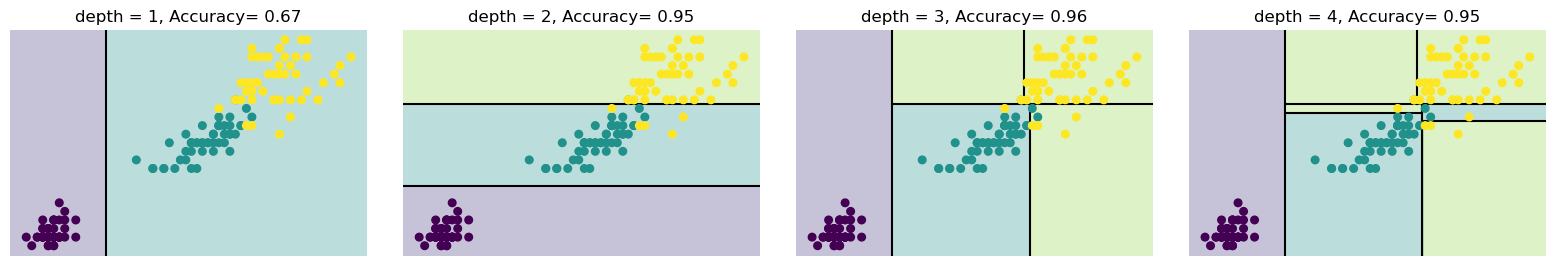

In [33]:
import sys

sys.path.append("/Users/ray/Desktop/pythonProject")

from helper_01 import visualize_tree
from sklearn.model_selection import cross_val_score


fig,axes = plt.subplots(1,4,figsize=(16,3),dpi=100)
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

for axi, depth in zip(axes, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth,criterion="gini")
    score = cross_val_score(model,X,y,cv=10,scoring="accuracy")
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}, Accuracy= {1}'.format(depth,round(np.mean(score),2)))
    
plt.show()

As observed from the graph, **higher depth can greatly improve the accuracy of our model but also entails higher risk of overfitting.** At depth of 3, the model performs best with little misclassification. But when the depth increases to 4, the accuracy begins to decrease slightly. In fact, depth of 4 indictates overfitting and the model definitely performs very bad on new cases that are not original part of train set. My intuition is that depth of 2 or 3 is good enough for the dataset.

**min_samples_split**

The parameter specifies the number of samples required to split an internal decision node. It can takes both integer and float.

- If int, a decision node has to contain at least min_samples_split for one split.
- If float, a decision node has to contain at least `min_samples_split*n_samples` for one split.

**min_samples_leaf**

The parameter specifies the number of samples required in a leaf node. Say we specify min_samples_leaf=2 and one split produces a leaf node with only one sample, then the split is not allowed. It also takes int or float.

According to *An empirical study on hyperparameter tuning of decision trees,* the ideal min_samples_split values tend to be between 1 and 40 for the CART algorithm. And min_samples_leaf should be between 1 and 20.

**max_features**

The parameter specifies how many features are considered for each split. There are a number of options available:
- `int/float` we specify a specific number for the parameter
- `sqrt` max_features = sqrt(n_features)
- `log2` max_features = log2(n_features)
- `None` max_features = n_features

Recall that each time algorithm splits the tree, it looks at a number of features and selects one with the minimum metric using gini or entropy, and then creates two subnodes on the feature. So it is computationally expensive to consider all features at each split.

The rule of thumb is that we can set the parameter as `log2` if the model has overfitting or the dataset is enormous. On the condition of the result, we can slightly bring the parameter up, such as trying `sqrt` or a specific number.

Reference:
 
- [Decision Tree Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning)
- [Parameter Tuning](https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680)
- [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/)